### Problem 01 - Glass
Prepare a model for glass classification using KNN

#### 1. Importing the Libraries

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale, StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold,cross_val_score, LeaveOneOut


####  2. Importing the Data

In [3]:
data_1 = pd.read_csv('glass.csv')
data_1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


####  3. Data Understanding

In [4]:
data_1.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
data_1.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
data_1.shape

(214, 10)

In [7]:
data_1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
data_1['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [9]:
# from above there total 7 class for different glasses and class 1 and 2 have highest frequency in given observations.
## description for classes are given.
###

In [10]:
corr_1 = data_1.corr()

<AxesSubplot:>

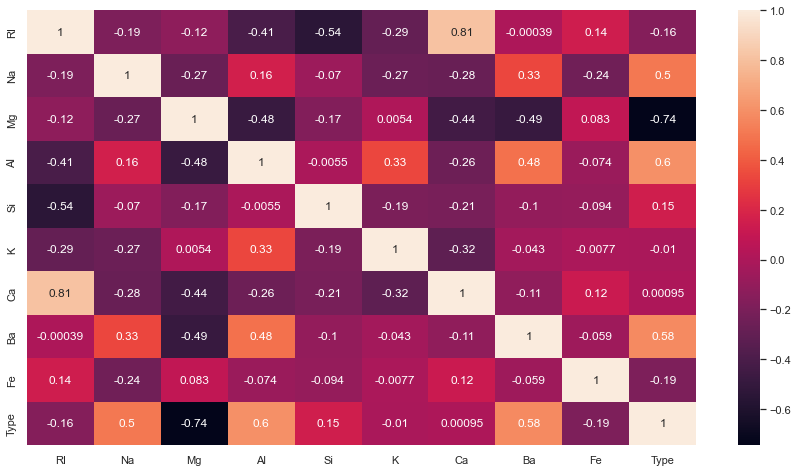

In [11]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_1, annot = True )

#### 4. Data Preparation

In [19]:
X_unscaled = data_1.drop(labels = ['Type'], axis = 1)
y = data_1[['Type']]

In [20]:
mm_scale = MinMaxScaler()

In [22]:
mm_scale = mm_scale.fit_transform(X_unscaled)

In [25]:
X= pd.DataFrame(data = mm_scale,columns=X_unscaled.columns)
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [26]:
X.head(),y.head()

(         RI        Na        Mg        Al        Si         K        Ca   Ba  \
 0  0.432836  0.437594  1.000000  0.252336  0.351786  0.009662  0.308550  0.0   
 1  0.283582  0.475188  0.801782  0.333333  0.521429  0.077295  0.223048  0.0   
 2  0.220808  0.421053  0.790646  0.389408  0.567857  0.062802  0.218401  0.0   
 3  0.285777  0.372932  0.821826  0.311526  0.500000  0.091787  0.259294  0.0   
 4  0.275241  0.381955  0.806236  0.295950  0.583929  0.088567  0.245353  0.0   
 
     Fe  
 0  0.0  
 1  0.0  
 2  0.0  
 3  0.0  
 4  0.0  ,
    Type
 0     1
 1     1
 2     1
 3     1
 4     1)

In [27]:
X.shape , y.shape

((214, 9), (214, 1))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

In [29]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((171, 9), (43, 9), (171, 1), (43, 1))

#### 5. Model Building | 6.Model Training | 7. Model Testing

In [30]:
print('Training Accuracy Comparison fro different values of K')
acc_score = []
i_for_graph = []
for i in range(2,22):
    if i%2 == 1:
        knn_classifier_i = KNeighborsClassifier(n_neighbors=i)
        knn_classifier_i.fit(X_train,y_train)
        y_pred_i = knn_classifier_i.predict(X_train)
        acc_score_i = round(accuracy_score(y_train,y_pred_i),4)
        acc_score.append(acc_score_i)
        print('Accuracy Score for K=',i,': ', acc_score_i)
        i_for_graph.append(i)
        i=i+1 
    else :
        i=i+1 
print(np.max(acc_score))

Training Accuracy Comparison fro different values of K
Accuracy Score for K= 3 :  0.7953
Accuracy Score for K= 5 :  0.7778
Accuracy Score for K= 7 :  0.7076
Accuracy Score for K= 9 :  0.6608
Accuracy Score for K= 11 :  0.6901
Accuracy Score for K= 13 :  0.6608
Accuracy Score for K= 15 :  0.6316
Accuracy Score for K= 17 :  0.6433
Accuracy Score for K= 19 :  0.6667
Accuracy Score for K= 21 :  0.6491
0.7953


In [31]:
print('Testing Accuracy Comparison for different values of K')
acc_score_test = []
for i in range(2,22):
    if i%2 == 1:
        knn_classifier_i = KNeighborsClassifier(n_neighbors=i)
        knn_classifier_i.fit(X_train,y_train)
        y_pred_test_i = knn_classifier_i.predict(X_test)
        acc_score_test_i = round(accuracy_score(y_test,y_pred_test_i),4)
        acc_score_test.append(acc_score_test_i)
        print('Accuracy Score for K=',i,': ', acc_score_test_i)
        i=i+1 
    else :
        i=i+1 
print(np.max(acc_score_test))

Testing Accuracy Comparison for different values of K
Accuracy Score for K= 3 :  0.6977
Accuracy Score for K= 5 :  0.6512
Accuracy Score for K= 7 :  0.6279
Accuracy Score for K= 9 :  0.6744
Accuracy Score for K= 11 :  0.6512
Accuracy Score for K= 13 :  0.6279
Accuracy Score for K= 15 :  0.6279
Accuracy Score for K= 17 :  0.6744
Accuracy Score for K= 19 :  0.6279
Accuracy Score for K= 21 :  0.6512
0.6977


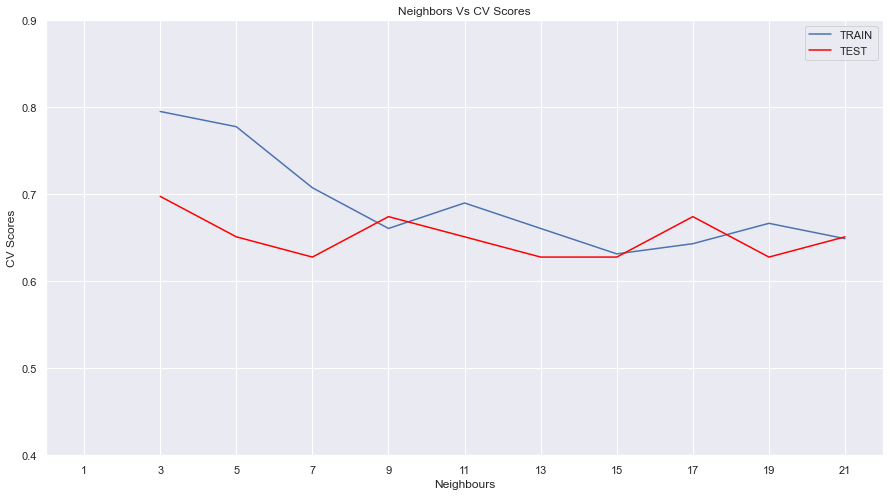

In [32]:
plt.plot(i_for_graph,acc_score, label = 'TRAIN')
plt.plot(i_for_graph,acc_score_test, color = 'red', label = 'TEST')
plt.legend()
plt.xlim(0,22)
plt.xticks(range(1,23,2)) 
plt.ylim(0.4, 0.9)
plt.xlabel('Neighbours')
plt.ylabel('CV Scores')
plt.title('Neighbors Vs CV Scores')
plt.show()

In [34]:
# from above we can conclude training and testing accuracy is higher fro K value  =3 it is 79.53 % and 69.77%  respectively
## so the K = 3 is selected for model.

#### 8. Output Evaluation

In [35]:
knn_classifier_3 = KNeighborsClassifier(n_neighbors=3)
knn_classifier_3.fit(X_train,y_train)
y_pred_3 = knn_classifier_3.predict(X_train)
y_pred_test_3 = knn_classifier_3.predict(X_test)

In [36]:
print('Accuracy Score for Train data:\n', round(accuracy_score(y_train,y_pred_3),4))
print('Confusion Matrix for Train data :\n' ,confusion_matrix(y_train, y_pred_3))
print('Accuracy Score for Test data:\n', round(accuracy_score(y_test,y_pred_test_3),4))
print('Confusion Matrix for Test data :\n',confusion_matrix(y_test, y_pred_test_3))

Accuracy Score for Train data:
 0.7953
Confusion Matrix for Train data :
 [[48  7  1  0  0  0]
 [ 8 50  1  2  0  0]
 [ 6  3  5  0  0  0]
 [ 0  1  0  8  0  1]
 [ 0  0  0  1  6  0]
 [ 1  1  0  0  2 19]]
Accuracy Score for Test data:
 0.6977
Confusion Matrix for Test data :
 [[11  3  0  0  0  0]
 [ 3 10  1  1  0  0]
 [ 2  1  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  6]]


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x132f9594b50>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x132f9297f10>)

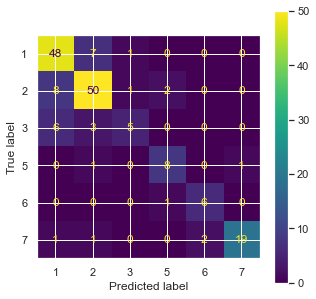

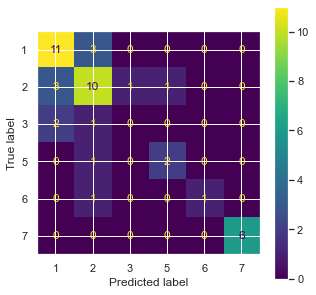

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx  = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(knn_classifier_3, X_train, y_train, ax= ax), plot_confusion_matrix(knn_classifier_3, X_test, y_test, ax= bx)

In [38]:
%%time
n_fold = KFold(n_splits=5,shuffle=True, random_state=12)

cv_scores = cross_val_score(estimator = knn_classifier_3,X = X,y=y,cv=n_fold)
print('CV Scores     : ',cv_scores)
print('Mean Accuracy : ',cv_scores.mean())
print('Std Deviation : ',cv_scores.std())

CV Scores     :  [0.72093023 0.72093023 0.6744186  0.72093023 0.5952381 ]
Mean Accuracy :  0.6864894795127353
Std Deviation :  0.04905306833005521
Wall time: 77.3 ms


In [39]:
%%time
loocv = LeaveOneOut()
cv_scores = cross_val_score(estimator = knn_classifier_3,X = X,y=y,cv=loocv)
print('CV Scores     : ',cv_scores)
print('Mean Accuracy : ',cv_scores.mean())
print('Std Deviation : ',cv_scores.std())

CV Scores     :  [1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy :  0.7009345794392523
Std Deviation :  0.4578485500529304
Wall time: 2.3 s


#### Final Comparisons between Train test split, K fold and Loocv
we can conclude that model with train test split with K =3 is the best model